# Linear Rgression

Fitting a linear regression means finding intecept and coeffiecient(also called weights orparameters). These values define the best fitting line that minimizes the error between the predicted values and the actual values.

Simple Linear Regression: y=mx+c

Multiple Linear Regression: 𝑦=𝛽0+𝛽1𝑥1+𝛽2𝑥2+...+𝛽𝑛𝑥𝑛

Where: 
- y is the dependent variable (target)
- 𝑥1,𝑥2,... are the independent variables (features)
- 𝛽0 is the intercept (bias)
- 𝛽1,𝛽2,... are the sploe (weights/coeffieient)

Objective: We try to find the best values of `m` and `c` so that the line fits the data properly. Best fit means the line that gives the least error between actual and predicted values. These values define the best-fitting line that minimizes the error between the predicted values and the actual values.

 Objective function: Minimize the Error
Main goal is to make predictions as close as possible to the actual values. For this, we use some error/loss functions:
 
- **Least Squared Error**
- **Ordinary Squared Error**
- **Mean Squared Error (MSE)**
- **Root Mean Squared Error (RMSE)**
  
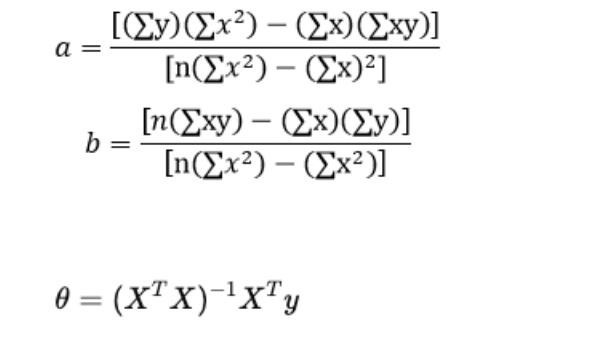





When we solve **linear regression** using matrix math, sometimes we need to find the **inverse** of a matrix.

### 🧮 What is an Inverse of a Matrix?

For example, in normal math: 2 × (1/2) = 1
A × A⁻¹ = I

Where:
- `A` is a matrix
- `A⁻¹` is the inverse of matrix A
- `I` is the **identity matrix** (like number 1 in matrix form)

If we can find such an A⁻¹, then matrix A is called **invertible**.

### ❓ What is an Invertible Matrix?

A matrix is **invertible** if we can find its inverse.

If we can't find the inverse (maybe the matrix is broken or weak), then it is **not invertible** (also called "singular matrix").

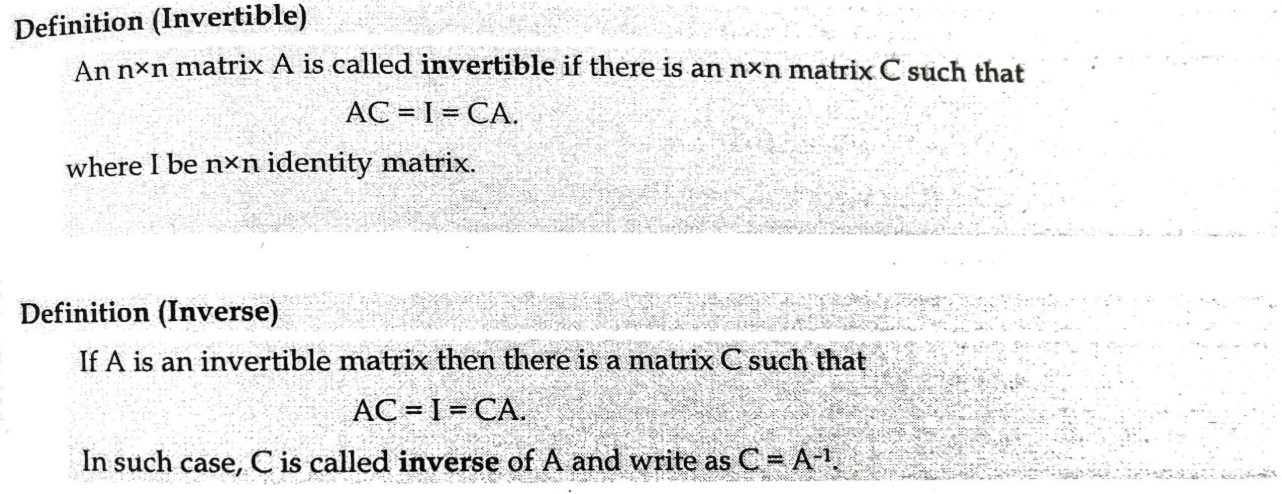

A matrix is not invertible when:
- Two or more columns (features) are very similar or the same
- There are more columns (features) than rows (data points)


This causes problems in solving equations like:

β = (XᵀX)⁻¹ XᵀY

Because `(XᵀX)` may not have an inverse.


### ✅ Solution: Use SVD (Singular Value Decomposition)

If we can't find the inverse, we use **SVD** — a special method in math that always works.

SVD breaks a matrix into smaller parts and helps us find something called a **pseudo-inverse**.

Using SVD, we can still solve the regression:

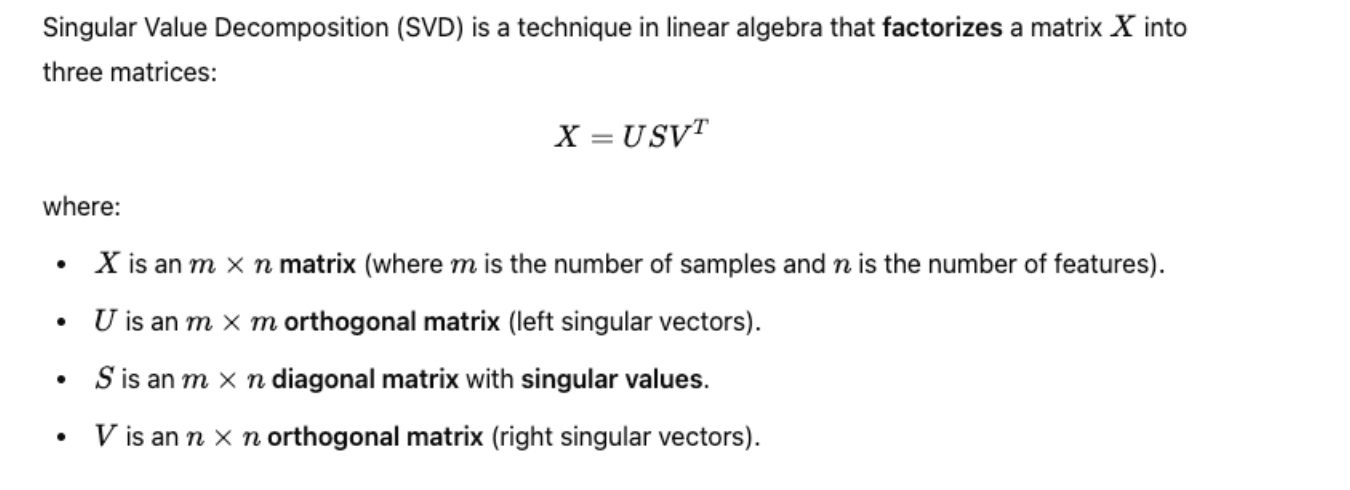

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
df = pd.read_csv("Advertising.csv")

In [7]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [10]:
print(df.shape)
print(df.info)

(200, 5)
<bound method DataFrame.info of      Unnamed: 0     TV  radio  newspaper  sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
..          ...    ...    ...        ...    ...
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4

[200 rows x 5 columns]>


In [11]:
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [12]:
df.duplicated().sum()

0

In [13]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [14]:
df.drop(df.columns[0], axis=1, inplace=True)

In [15]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


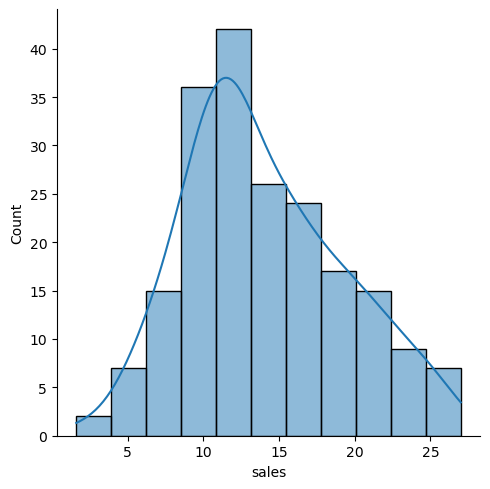

In [20]:
sns.displot(df.sales,kde=True)

<Axes: xlabel='newspaper', ylabel='Count'>

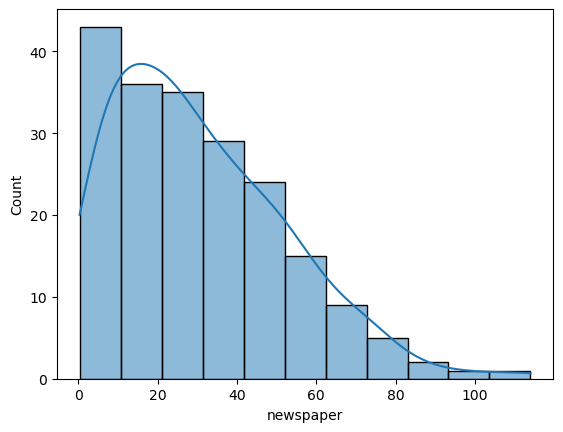

In [22]:
sns.histplot(df['newspaper'],kde=True)

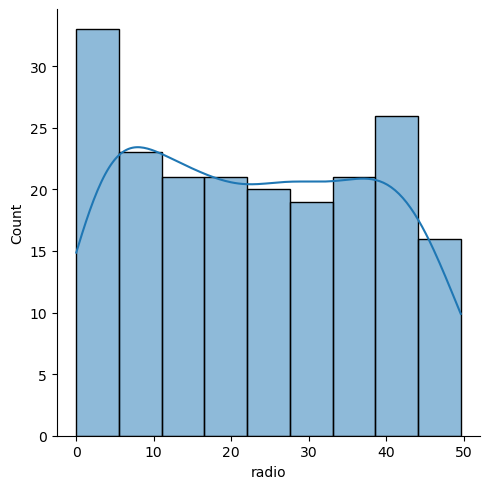

In [25]:
sns.displot(df['radio'],kde=True)

In [26]:
df.TV.corr(df.sales)

0.7822244248616066

In [27]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<Axes: >

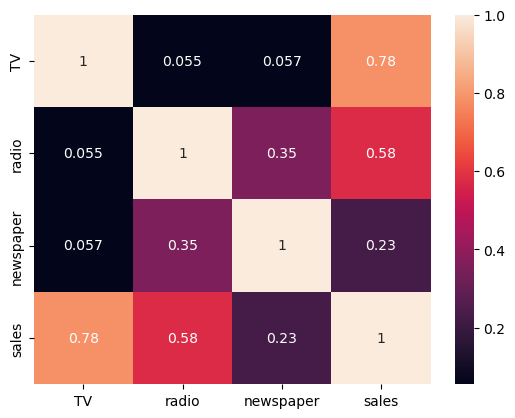

In [28]:
sns.heatmap(df.corr(), annot=True)

In [37]:
X = df.drop(columns=['sales'])
y = df['sales']

lm1 = LinearRegression() #first model
lm1.fit(X,y)

print(lm1.intercept_)
print(lm1.coef_)


2.9388893694593996
[ 0.04576465  0.18853002 -0.00103749]


In [39]:
#pair the feature names with the coefficients
list(zip(X.columns, lm1.coef_))

[('TV', 0.04576464545539765),
 ('radio', 0.18853001691820453),
 ('newspaper', -0.0010374930424762346)]

In [46]:
lm1_preds = lm1.predict(X[['TV','radio','newspaper']])

In [54]:
print("R^2 error: ", r2_score(y, lm1_preds))
# print("Mean Squred: ", mean_squared_error(y, lm1_preds))

R^2 error:  0.8971942610828957


In [48]:
feature_cols = ['TV', 'radio']
X = df[feature_cols]
y = df.sales

lm1 = LinearRegression()
lm1.fit(X, y)

print(lm1.intercept_)
print(lm1.coef_)

2.921099912405131
[0.04575482 0.18799423]


In [49]:
lm1_preds = lm1.predict(X[['TV', 'radio']])

In [55]:
r2 = r2_score(y, lm1_preds)
mse = mean_squared_error(y, lm1_preds)

print(f"R² Score: {r2:.2f}")   
# print(f"Mean Squared Error: {mse:.2f}")

R² Score: 0.90


**MSE**: Measures the average squared difference between actual and predicted values.

Small MSE → Predictions are close to actual values (good model).

Large MSE → Predictions have large errors (bad model).

**R²** measures how much of the variance in the target variable is explained by the model

1 → Perfect fit (model explains all variance)

0 → Model does not explain any variance (as bad as predicting the mean)

Higher R² means a better model